# Aufgabe 3 – Fragestellungen und Zielvariablen begrenzen die Methodenauswahl

# Aufgabe 3a)

**Aufgabenstellung**

Der Datensatz `employment_08_09.xlsx` beinhaltet die sozioökonomischen Daten der Arbeitskräfte in den USA im April 2008 und Angaben, ob sie im April 2009 weiterhin angestellt sind. Alle Befragten waren im April 2008 angestellt. Sagen Sie basierend auf den 2008er Informationen vorher, welche Arbeitskraft 2009 arbeitslos wird. Haben ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während der Finanzkrise 2008-2009?

**Zusammenfassung**

Der Datensatz ist stark unbalanciert, was das Training erschwert. Nach eingehender Analyse ist unser Ergebnis, dass ältere Arbeitskräfte kein höheres Risiko für Arbeitslosigkeit während der Finanzkrise haben.

## Einlesen des Datensatzes

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns

# Load dataset
data = pd.read_excel('./data/employment_08_09.xlsx')

In [2]:
data.shape

(5412, 21)

In [3]:
data.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


## Untersuchung der Merkmale

"These data file contains data on 5412 workers who were survey in the April 2008 Current Population Survey and reported that they were employed. The data file contains their employment status in April 2009, one year later, along with some additional variables."

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 21 columns):
age             5412 non-null int64
race            5412 non-null int64
earnwke         4773 non-null float64
employed        5412 non-null int64
unemployed      5412 non-null int64
married         5412 non-null int64
union           5412 non-null int64
ne_states       5412 non-null int64
so_states       5412 non-null int64
ce_states       5412 non-null int64
we_states       5412 non-null int64
government      5412 non-null int64
private         5412 non-null int64
self            5412 non-null int64
educ_lths       5412 non-null int64
educ_hs         5412 non-null int64
educ_somecol    5412 non-null int64
educ_aa         5412 non-null int64
educ_bac        5412 non-null int64
educ_adv        5412 non-null int64
female          5412 non-null int64
dtypes: float64(1), int64(20)
memory usage: 888.0 KB


Erkenntnis: Es gibt nur in der Spalte `earnwke` fehlende Werte

#### Beschreibung der Merkamle

- Beschäftigungsstatus des Arbeiters im Jahr 2009 (_Zielvariable_): Kategorisch-Nominal
    - `employed`: Integer (= 1, wenn im Jahr 2009 noch angestellt)
    - `unemployed`: Integer (= 1, wenn im Jahr 2009 nicht mehr angestellt)
    
Informationen über den Arbeiter im Jahr 2008:

- Alter: Numerisch-Kontinuierlich
    - `age`: Integer

- Geschlecht: Kategorisch-Nominal
    - `female`: Integer (= 1, wenn weiblich)

- Familienstand: Kategorisch-Nominal
    - `married`: Integer (= 1, wenn Verheiratet)

- Selbst-Identifizierte Rasse, Kategorisch-Nominal
    - `race`: Integer (weiß=1, schwarz=2, andere=3)

- Gewerkschaftszugehörigkeit: Kategorisch-Nominal
    - `union`: Integer (= 1, wenn Gewerkschaftsmitglied)

- Bundesstaats-Angehörigkeit: Kategorisch-Nominal
    - `ne_states`: Integer (= 1, wenn von Nordost-Staat)
    - `so_states`: Integer (= 1, wenn von Südstaat)
    - `ce_states`: Integer (= 1, wenn von zentralem Staat)
    - `we_states`: Integer (= 1, wenn von Weststaat)

- Angestelltenverhältnis: Kategorisch-Nominal
    - `private`: Integer (= 1, wenn angestellt in privatem Betrieb)
    - `government`: Integer (= 1, wenn angestellt von der Regierung)
    - `self`: Integer (= 1, wenn selbstständig)

- Höchster Abschluss: Kategorisch-Ordinal
    - `educ_lths`: Integer (= 1, wenn höchster Abschluss niedriger als High-School)
    - `educ_hs`: Integer (= 1, wenn höchster Abschluss ist High-School)
    - `educ_somecol`: Integer (= 1, wenn höchster Abschluss ist College)
    - `educ_aa`: Integer (= 1, wenn höchster Abschluss ist AA)
    - `educ_ba`: Integer (= 1, wenn höchster Abschluss ist BA oder BS)
    - `educ_adv`: Integer (= 1, wenn höchster Abschluss fortgeschritten)

- Durschnittliches wöchentliches Einkommen: Numerisch-Kontinuierlich
    - `earnwke`: Float




## Verteilung der Zielvariable

In [5]:
# Number of objects with contradiction (employed and unemployed)
data[(data['employed']==1) & (data['unemployed']==1)].count()[0]

0

Es gibt keine Datenobjekte, die eine ungültige Beschäftigungsinformation enthalten, bei welcher der Arbeiter gleichzeitig beschäftigt und nicht beschäftigt ist.

In [6]:
# Are there objects with no information (not employed and not unemployed)
data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

435

Es gibt 435 Datenobjekte, die keine Information über den Beschäftigungsstatus 2009 enthalten.

In [7]:
# Preparing values for the barplot
employed = data[data['employed']==1].count()[0]
unemployed = data[data['unemployed']==1].count()[0]
no_information = data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

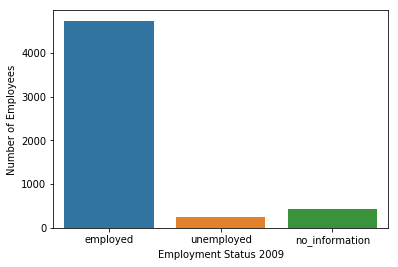

In [8]:
# Instanciating a new dataframe to have a nice barplot with descriptions
plot_data = pd.DataFrame({'Employment Status 2009': ['employed', 'unemployed', 'no_information'], 
                          'Number of Employees': [employed, unemployed, no_information]})
# Drawing the barplot
ax = sns.barplot(x='Employment Status 2009', y='Number of Employees', data=plot_data, ci=None)

# Alternative (without descriptions)
# ax = sns.barplot(data=[[employed], [unemployed], [no_information]], ci=None)

Erkenntnis: 
Datenobjekte ohne Beschäftigungsstatus 2009 können zum Trainieren / Testen nicht verwendet werden und sollten deshalb bei der Datenvorverarbeitung entfernt werden.

In [9]:
# Ratio of employed workers
employed / (employed + unemployed)

0.951979103877838

Erkenntnis: Nur ungefähr 5% der Arbeiter hatten im Jahr 2008 keine Beschäftigung mehr. Hierbei handelt es sich also um einen unbalancierten Datensatz.

## Datenvorverarbeitung

###### 1. Entfernen der Datenobjekte ohne Beschäftigungsinformation 2009

In [10]:
# Set rows with no information about Employment Status 2009 no NaN
data_cleaned = data.where(cond=(data['employed']==1) | (data['unemployed']==1))

# Removing those rows from the dataframe
data_cleaned = data_cleaned.dropna(how='all')

In [11]:
# New size of the dataframe
data_cleaned.shape

(4977, 21)

###### 2. Trennen der unabhängigen Daten (`X`) von den abhängigen Daten (Zielvariable `y`)

In [12]:
X = data_cleaned.drop(['employed', 'unemployed'], axis=1)

In [13]:
X.columns

Index(['age', 'race', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'educ_lths',
       'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv', 'female'],
      dtype='object')

In [14]:
y = data_cleaned[['employed', 'unemployed']]

###### 3. Fehlende Daten in der Spalte `earnwke` ergänzen

In [15]:
# Import SimpleImputer from sklearn (Can replace missing values)
from sklearn.impute import SimpleImputer
# Import numpy to access the nan value
import numpy as np

In [16]:
# Instanciate SimpleImputer with np.nan and strategy 'mean' (replaces missing values with mean)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [17]:
# Fit the Imputer on the data and transform it
X[["earnwke"]] = imputer.fit_transform(X[["earnwke"]].to_numpy())

In [18]:
# Check if missing values are replaced
X[["earnwke"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 5411
Data columns (total 1 columns):
earnwke    4977 non-null float64
dtypes: float64(1)
memory usage: 77.8 KB


###### 4. Überprüfen der One-Hot encodierten Daten

In [19]:
def is_one_hot_encoded(a):
    if np.any(np.logical_and(a!=1, a!=0)):
        return False
    if np.any(a.sum(axis=1) != 1):
        return False
    return True

In [20]:
is_one_hot_encoded(X[['ne_states', 'so_states', 'ce_states', 'we_states']])

True

In [21]:
is_one_hot_encoded(X[['government', 'private', 'self']])

True

In [22]:
is_one_hot_encoded(X[['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv']])

True

Erkenntnis: Die Informatioen über _Bundesstaats-Angehörigkeit_, _Beschäftigungsverhältnis_ und _höchster Abschluss_ sind korrekt und vollständig One-Hot-Enkodiert. Es gibt keine Widersprüchlichkeiten oder fehlende Informationen.

Da das Merkmal _höchster Abschluss_ kategorisch-ordinal ist, könnte man dieses in einer Variable kodieren, worauf aber an dieser Stelle verzichtet wird:

In [23]:
def one_hot_to_ordinal(a):
    def index_of_one(a):
        return np.where(a == 1)[0]
    
    return np.apply_along_axis(func1d=index_of_one, axis=1, arr=a)
    
X['educ'] = one_hot_to_ordinal(X[['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv']])
X = X.drop(['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv'], axis=1)

In [24]:
X.columns

Index(['age', 'race', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'female',
       'educ'],
      dtype='object')

In [25]:
is_one_hot_encoded(y[['employed', 'unemployed']])

True

Erkenntnis: Das Entfernen der Datenobjekte mit fehlenden Informationen über das _Beschäftigungsstatus 2009_ (Schritt 1) hat funktioniert.

Die Spalte `unemployed` kann jetzt entfertn werden, da sie gegenüber der Spalte `employed` keine neuen Informationen enthält:

In [26]:
y = y.drop(['unemployed'], axis=1)

In [27]:
# Check if it worked
y.columns

Index(['employed'], dtype='object')

###### 5. One-Hot Enkodierung

In [28]:
# Import OneHotEncoder from sklearn (Can do one-hot encoding)
from sklearn.preprocessing import OneHotEncoder

In [29]:
# Instanciate OneHotEncoder with determined indices
onehotencoder = OneHotEncoder(categories = 'auto')

# Compute one-hot encoded columns
race_one_hot = onehotencoder.fit_transform(X[['race']]).toarray()

# Remove original column
X = X.drop(['race'], axis=1)

# Add one-hot encoded columns
X['race_white'], X['race_black'], X['race_other'] = np.split(race_one_hot, indices_or_sections=3, axis=1)

In [30]:
# Check if it worked
X.columns

Index(['age', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'female',
       'educ', 'race_white', 'race_black', 'race_other'],
      dtype='object')

###### 6. Auteilung in Training-  und Test-Daten

In [31]:
# Import train_test_split from sklearn (Can do splitting)
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

###### 7. Feature-Scaling

In [33]:
# Import StandardScaler from sklearn (Can do feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [34]:
sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Training und Analyse

###### Mögliche Methoden

Es handelt sich bei der Entscheidung, ob ein Beschäftigter aus dem Jahr 2008 auch im Jahr 2009 noch beschäftigt ist, um eine Klassifikationsaufgabe. 

Zudem soll bestimmt werden, ob ältere Arbeitskräfte ein ein höheres Risiko für Arbeitslosigkeit im Jahr 2009 haben. 

Deshalb sollte eine Klassifikations-Methode gewählt werden, bei der nach dem Training bestimmt werden kann, welche Features besonders großen Einfluss auf die Klassifikation haben.

Mögliche Methoden hierfür sind _Logistische Regression_ und _Entscheidungsbäume_.

Aufgrund der Tatsache, dass es sich um einen unbalancierten Datensatz handelt, wird neben der Metrik "accuracy_score" zusätzlich die Metrik "balanced_accuracy_score" verwendet, welche den durschnittlichen Recall auf allen Klassen berechnet.

Siehe auch: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

###### Baseline: Häufigste Klasse

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [78]:
# Accuracy on Test Data
accuracy_score(y_train, np.ones_like(y_train))

0.953529264004019

In [77]:
# Accuracy on Test Data
accuracy_score(y_test, np.ones_like(y_test))

0.9457831325301205

In [37]:
balanced_accuracy_score(y_test, np.ones_like(y_test))

0.5

Wie erwartet erreicht man mit der Vorhersage der häufigsten Klasse eine Accuracy von ca 95% und eine Balanced Accuracy von 0,5.

###### Baseline: Logistische Regression (Lineare Regression?!?)

In [38]:
# Import Logistic Regresseion from sklearn
from sklearn.linear_model import LogisticRegression

In [39]:
model_lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train['employed'])

In [40]:
# Accuracy on Training Data
model_lr.score(X_train, y_train)

0.953529264004019

In [41]:
# Accuracy on Test Data
model_lr.score(X_test, y_test)

0.9457831325301205

In [42]:
balanced_accuracy_score(y_test, model_lr.predict(X_test))

0.5

Die Metriken zeigen für den Klassifikator basierend auf logistischer Regression die gleichen Ergebnisse wie für den Klassifikator, der Objekte immer der häufigsten Klasse zuordnet.

Das bedeutet, dass auch dieser Klassifikator nur gelernt hat, die Objekte immer der häufigsten Klasse zuzuordnen.

###### Entscheidungsbaum (Decision Tree)

In [43]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [44]:
model_dt = DecisionTreeClassifier().fit(X_train, y_train)

In [45]:
# Accuracy on Training Data
model_dt.score(X_train, y_train)

0.9994976136649083

In [46]:
# Accuracy on Test Data
model_dt.score(X_test, y_test)

0.8905622489959839

In [47]:
balanced_accuracy_score(y_test, model_dt.predict(X_test))

0.5144491625383345

Die Metriken zeigen für den Klassifikator basierend auf einem Entscheidungsbaum, dass er zwar sehr gut gelernt hat, die Trainingsdaten zu klassifizieren, jedoch bei den Testdaten fehlschlägt.

Dennoch hat er eine höhere Balanced Accuracy, was bedeutet, dass nicht mehr stumpf alle Datenobjekte gleich klassifiziert werden.

###### Random Forest

In [114]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [115]:
model_rf = RandomForestClassifier(n_estimators = 1, random_state=0).fit(X_train, y_train['employed'])

In [116]:
# Accuracy on Training Data
model_rf.score(X_train, y_train)

0.9658377292137654

In [117]:
# Accuracy on Test Data
model_rf.score(X_test, y_test)

0.8945783132530121

In [118]:
balanced_accuracy_score(y_test, model_rf.predict(X_test))

0.5078438310922387

Die Metriken zeigen für den Klassifikator basierend auf einem Random Forest ähnliche Ergebnisse wie für den Entscheidungsbaum.

###### Support Vector Machine

In [53]:
# Import RandomForestClassifier from sklearn
from sklearn import svm

In [54]:
model_svm = svm.SVC(gamma='scale').fit(X_train, y_train['employed'])

In [55]:
# Accuracy on Training Data
model_svm.score(X_train, y_train)

0.953529264004019

In [56]:
# Accuracy on Test Data
model_svm.score(X_test, y_test)

0.9457831325301205

In [57]:
balanced_accuracy_score(y_test, model_svm.predict(X_test))

0.5

Diese SVM ordnet ebenfalls stumpf alle Datenobjekte der häufigsten Klasse zu.

###### K-Nearest Neighbors

In [58]:
# Import RandomForestClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model_knn = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train['employed'])

In [60]:
# Accuracy on Training Data
model_knn.score(X_train, y_train)

0.953529264004019

In [61]:
# Accuracy on Test Data
model_knn.score(X_test, y_test)

0.9457831325301205

In [62]:
balanced_accuracy_score(y_test, model_knn.predict(X_test))

0.5

Dieser kNN-Klassifikator ordnet ebenfalls stumpf alle Datenobjekte der häufigsten Klasse zu.

###### Naive Bayes

In [63]:
# Import RandomForestClassifier from sklearn
from sklearn.naive_bayes import GaussianNB

In [64]:
model_nb = GaussianNB().fit(X_train, y_train['employed'])

In [65]:
# Accuracy on Training Data
model_nb.score(X_train, y_train)

0.8791760864104496

In [66]:
# Accuracy on Test Data
model_nb.score(X_test, y_test)

0.8684738955823293

In [67]:
balanced_accuracy_score(y_test, model_nb.predict(X_test))

0.5638711960368011

Naive Bayes hat zwar die beste Balanced Accuracy, allerdings schlechte Accuracy auf Trainings- und Testdaten.

## Schlussfolgerungen

###### Haben ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während der Finanzkrise 2008-2009?

In [120]:
# Feature importance according to Logistic Regression Classifier
# sorted(zip(X.columns.tolist(), model_lr.coef_[0]), key=lambda x: x[1], reverse = True)

In [69]:
# Feature Importance according to Decision Tree classifier
sorted(zip(X.columns.tolist(), model_dt.feature_importances_), key=lambda x: x[1], reverse = True)

[('earnwke', 0.37389775567171346),
 ('age', 0.27731623502609787),
 ('educ', 0.09859113235251757),
 ('female', 0.05532070127215288),
 ('we_states', 0.03848794682689061),
 ('ne_states', 0.028222829319694772),
 ('so_states', 0.02733278745068072),
 ('ce_states', 0.018758198297992974),
 ('race_black', 0.01677329772286498),
 ('union', 0.01631717446483985),
 ('race_white', 0.014252898912898717),
 ('race_other', 0.013092040282678208),
 ('private', 0.00973444125655713),
 ('government', 0.006651352826019401),
 ('married', 0.004687009411887953),
 ('self', 0.0005641989045128651)]

In [70]:
# Feature Importance according to Random Forrest classifier
sorted(zip(X.columns.tolist(), model_rf.feature_importances_), key=lambda x: x[1], reverse = True)

[('earnwke', 0.36929827016109273),
 ('age', 0.2959356211677001),
 ('educ', 0.1017876642965056),
 ('female', 0.03769249827969091),
 ('married', 0.028384974517249063),
 ('so_states', 0.02290388402290427),
 ('union', 0.022090310384746535),
 ('ne_states', 0.02166971503127492),
 ('ce_states', 0.021375153637642325),
 ('we_states', 0.02046688122039026),
 ('race_white', 0.014553025828768568),
 ('race_black', 0.012911133607546593),
 ('private', 0.009685927160231384),
 ('race_other', 0.009473512793535421),
 ('self', 0.006081024148935331),
 ('government', 0.0056904037417860555)]

Laut dem Attribut `feature_importances_` des Decision-Tree- und Random-Forrest-Klassifizierers hat das Merkmal "Alter" den zweitstärksten Einfluss auf die Arbeitslosigkeit. Einen stärkeren Einfluss hat nur das durchschnittliche wöchentliche Einkommen `earnwke`.

In der folgenden Korrelationsmatrix lässt sich zudem ablesen, dass das Merkmal `age` positiv mit `employment` korreliert, was bedeutet, dass ein höheres Alter eher darauf hindeutet, dass der Angestellte im Jahr 2009 immer noch eingestellt ist.

Die Frage ist daher mit "Nein" zu beantworten.

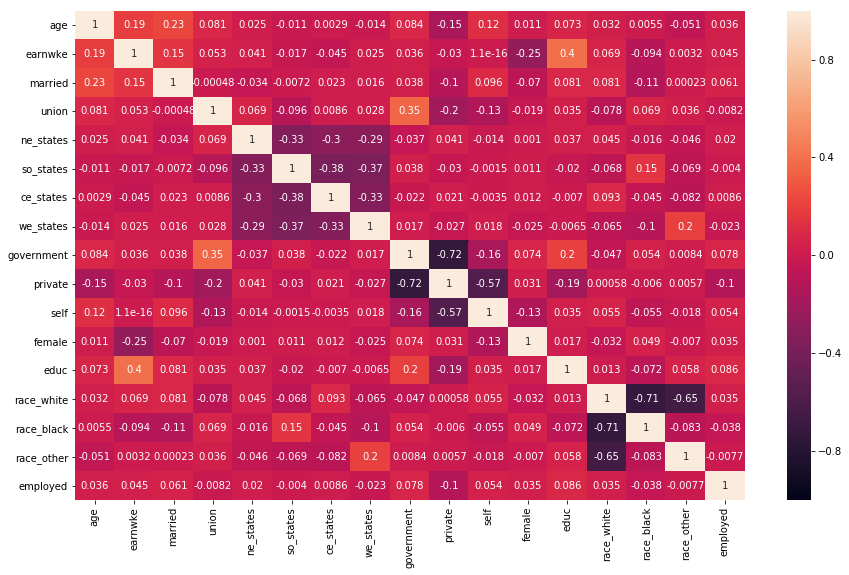

In [76]:
import matplotlib.pyplot as plt

correlation_matrix = pd.concat([X, y], axis=1).corr()
fig = plt.figure(figsize=(15,))
sns.heatmap(correlation_matrix,vmin=-1,vmax=1,annot=True)
plt.show()